In [104]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.optimize as opt
path="C:\\machine learning\\data\\ClassificationExamen1&2VsAdmitted.txt"
data=pd.read_csv(path,header=None,names=["Exam1","Exam2","Admitted"])

print(data.describe())

            Exam1       Exam2    Admitted
count  100.000000  100.000000  100.000000
mean    65.644274   66.221998    0.600000
std     19.458222   18.582783    0.492366
min     30.058822   30.603263    0.000000
25%     50.919511   48.179205    0.000000
50%     67.032988   67.682381    1.000000
75%     80.212529   79.360605    1.000000
max     99.827858   98.869436    1.000000


In [105]:
#Separate acceptd and not accepted 
positive=data[data["Admitted"].isin([1])]
negative=data[data["Admitted"].isin([0])]
print(positive.head(10))

        Exam1      Exam2  Admitted
3   60.182599  86.308552         1
4   79.032736  75.344376         1
6   61.106665  96.511426         1
7   75.024746  46.554014         1
8   76.098787  87.420570         1
9   84.432820  43.533393         1
12  82.307053  76.481963         1
13  69.364589  97.718692         1
15  53.971052  89.207350         1
16  69.070144  52.740470         1


Text(0.5, 1.0, 'calssifiation')

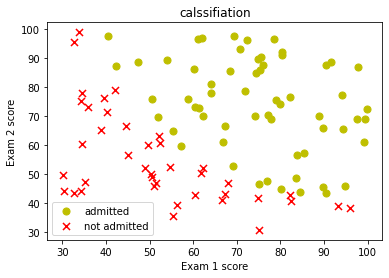

In [106]:
#Draw 
fig,ax=plt.subplots()
ax.scatter(positive["Exam1"],positive["Exam2"],c='y',s=50,label="admitted")
ax.scatter(negative["Exam1"],negative["Exam2"],c='r',s=50,marker="x",label="not admitted")
ax.legend()
ax.set_xlabel("Exam 1 score")
ax.set_ylabel("Exam 2 score")
ax.set_title("calssifiation")

In [107]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

print()
print('X.shape = ' , X.shape)
print('theta.shape = ' , theta.shape)
print('y.shape = ' , y.shape)



X.shape =  (100, 3)
theta.shape =  (3,)
y.shape =  (100, 1)


In [108]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return -np.sum(first + second) / (len(X))
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

thiscost = cost(theta, X, y)
print('cost = ' , thiscost)
      



cost =  0.6931471805599453


In [109]:
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
theta0 = result[0][0]
theta1 = result[0][1]
theta2 = result[0][2]
print("theta 0 = ",theta0)
print("theta 1 = ",theta1)
print("theta 2 = ",theta2)
costafteroptimize = cost(result[0], X, y)
print('cost after optimize = ' , costafteroptimize)

theta 0 =  -25.161318633098112
theta 1 =  0.2062315885628648
theta 2 =  0.20147148626677117
cost after optimize =  0.20349770158947458


In [110]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy,2))


accuracy = 89%
